In [1]:
!pip install pandas

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: pip install --upgrade pip


In [2]:
import cupy as cp
import pandas as pd
import pystrel as ps
import scipy.special as sp
import numpy as np
from IPython.display import clear_output

def measure(*, L, sparsity, device):
    model = ps.Model({"terms":{
        "Jz":{(i, i+1): 1.0 for i in range(L-1)},
        "hz":{i: 2.0 for i in range(L)},
    }})
    h = model.build_hamiltonian(sparsity=sparsity, dtype=np.float64, device=device)
    if device == "gpu":
            cp.cuda.Device().synchronize()
    del h

def run(L, sparsity, device):
    result = %timeit -q -o -n 10 -r 1 _ = measure(L=L, sparsity=sparsity, device=device)
    return result


In [3]:
def run_all(rrange, sparsity, device):
    sizes = []
    times = []
    for L in rrange:
        result = run(L, sparsity, device)
        size = int(sp.binom(L, L / 2))
        print(L, size, time:= result.average)
        times.append(time)
        sizes.append(size)

    clear_output()
    df = pd.DataFrame({"size": sizes, "time":times})
    return df


In [4]:
df_dense_cpu = run_all(range(4, 17), "dense", "cpu")
df_dense_cpu

,size,time
0,6,0.000492
1,10,0.000600
2,20,0.001493
3,37,0.002764
4,70,0.006421
5,132,0.012549
6,252,0.030867
7,481,0.062989
8,924,0.149662
9,1778,0.305271


In [5]:
df_dense_gpu = run_all(range(4, 17), "dense", "gpu")
df_dense_gpu

,size,time
0,6,0.027198
1,10,0.000638
2,20,0.001562
3,37,0.002628
4,70,0.006601
5,132,0.012625
6,252,0.030637
7,481,0.062277
8,924,0.150095
9,1778,0.313370


In [6]:
df_sparse_cpu = run_all(range(4, 18), "sparse", "cpu")
df_sparse_cpu

,size,time
0,6,0.001292
1,10,0.001337
2,20,0.002407
3,37,0.003787
4,70,0.007969
5,132,0.015201
6,252,0.037322
7,481,0.070957
8,924,0.170920
9,1778,0.337060


In [7]:
df_sparse_gpu = run_all(range(4, 18), "sparse", "gpu")
df_sparse_gpu

,size,time
0,6,0.002319
1,10,0.002352
2,20,0.003134
3,37,0.004293
4,70,0.008964
5,132,0.017648
6,252,0.038439
7,481,0.076358
8,924,0.172111
9,1778,0.337517


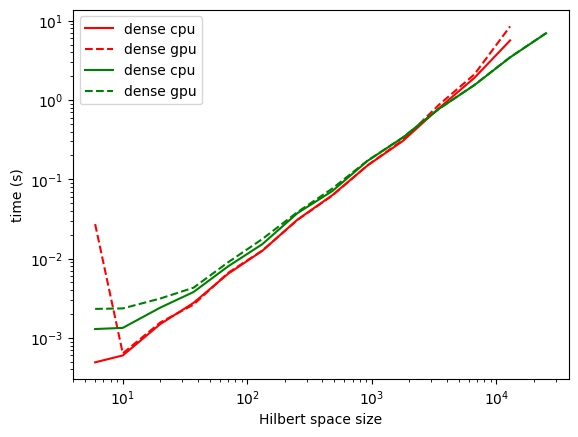

In [23]:
import matplotlib.pyplot as plt


plt.plot(df_dense_cpu["size"], df_dense_cpu["time"], label='dense cpu', color='red')
plt.plot(df_dense_gpu["size"], df_dense_gpu["time"], '--', label='dense gpu', color='red')
plt.plot(df_sparse_cpu["size"], df_sparse_cpu["time"], label='dense cpu', color='green')
plt.plot(df_sparse_gpu["size"], df_sparse_gpu["time"], '--', label='dense gpu', color='green')

plt.legend()
plt.xlabel('Hilbert space size')
plt.ylabel('time (s)')
plt.loglog()
plt.show()